# 3DoF Soft Landing with mass dynamics

## Problem definition

In [1]:
load_termination_criteria = true

ϵ_pd_JuMP = 1e-8
ϵ_gap_JuMP = 1e-8

ϵ_primal = 9e-4
ϵ_dual = 9e-4
ϵ_admm = 1e-4
ϵ_admm_dual = 1e-4

include("problem_data.jl");

λ / μ = 20.0


## Load PIPG tools

In [2]:
@load_file "pipg_suite.jl" true
@load_file "pipg_var.jl" true
@load_file "execute_utils.jl" true
@load_file "plotting.jl" false;

## Solve via JuMP

In [3]:
exe_utils.execute_JuMP!(:mosek);

0.045371055603027344

In [4]:
exe_utils.execute_JuMP_benchmark(:mosek)

BenchmarkTools.Trial: 286 samples with 1 evaluation.
 Range (min … max):  14.821 ms … 33.832 ms  ┊ GC (min … max): 0.00% … 46.69%
 Time  (median):     15.485 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   16.792 ms ±  3.898 ms  ┊ GC (mean ± σ):  6.34% ± 11.25%

   █▄▄                                                         
  ████▅▅▃▄▁▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▃▃▃▃▂▃▁▂▂ ▂
  14.8 ms         Histogram: frequency by time        29.1 ms <

 Memory estimate: 8.49 MiB, allocs estimate: 179809.

## Solve via PIPG

In [5]:
exe_utils.execute_PIPG_v3!();

Total PIPG iterations          : 378
Norm of optimum                : 2655.3714608442874
Distance to optimum (absolute) : 66.77090731678692
Distance to optimum (relative) : 0.02514559951456163 
Dynamics error                 : 0.49902046276825285

## Benchmark PIPG

In [7]:
# using BenchmarkTools
exe_utils.execute_PIPG_v3_benchmark()

BenchmarkTools.Trial: 145 samples with 1 evaluation.
 Range (min … max):  31.980 ms … 60.601 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     32.857 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   33.276 ms ±  2.625 ms  ┊ GC (mean ± σ):  0.00% ± 0.00%

    ▇█▆                                                        
  ▃████▇▃▆▄▁▃▁▁▁▁▂▂▁▁▁▂▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂ ▂
  32 ms           Histogram: frequency by time        45.5 ms <

 Memory estimate: 0 bytes, allocs estimate: 0.

In [8]:
# using TimerOutputs
exe_utils.execute_PIPG_v3_timeit()

 ────────────────────────────────────────────────────────────────────
                            Time                    Allocations      
                   ───────────────────────   ────────────────────────
 Tot / % measured:      1.24s /  53.8%           51.5MiB /   0.0%    

 Section   ncalls     time    %tot     avg     alloc    %tot      avg
 ────────────────────────────────────────────────────────────────────
 PIPG          20    665ms  100.0%  33.3ms     0.00B     - %    0.00B
 ────────────────────────────────────────────────────────────────────

## Diagnostic data

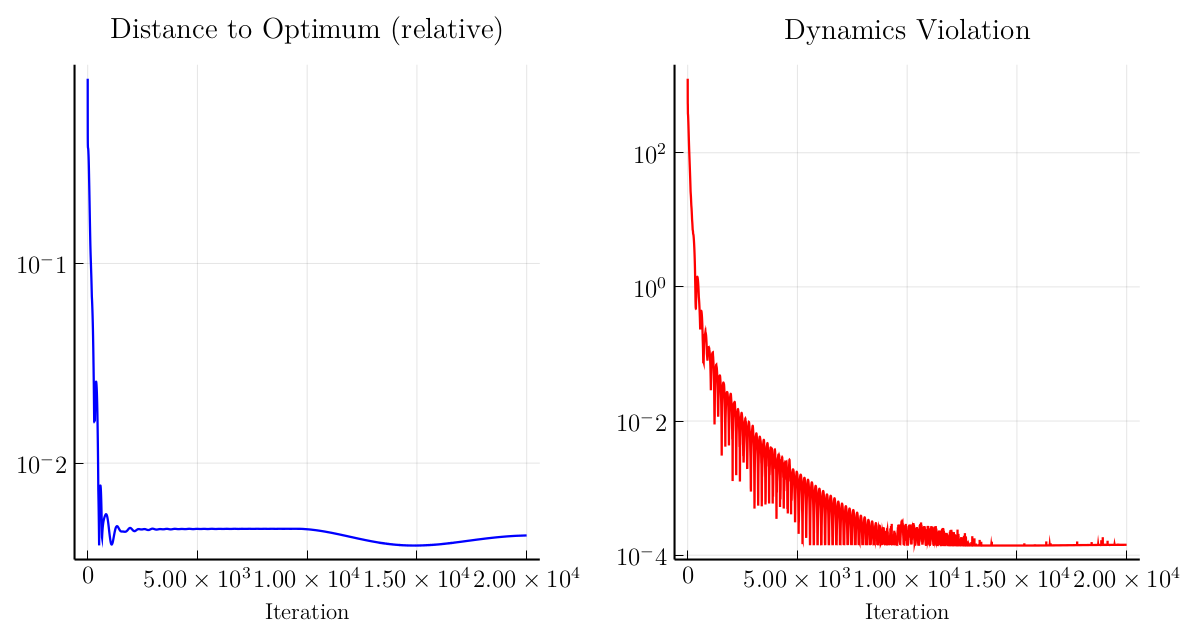

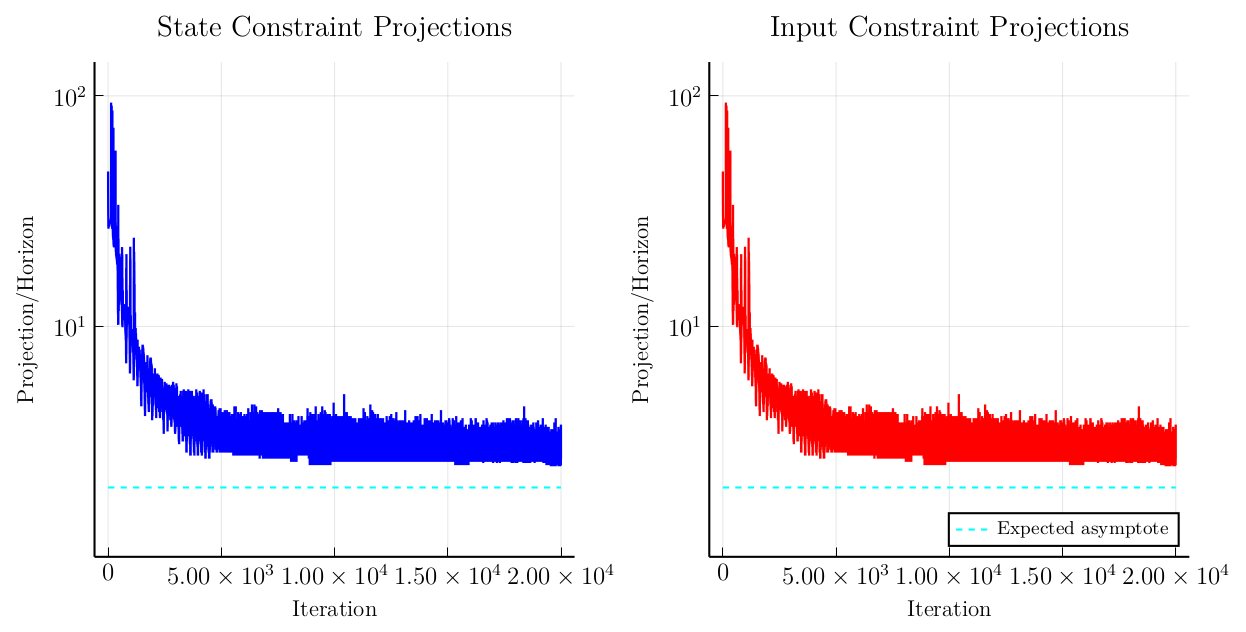

Power iteration estimate of σ  : 4.973409341668455
SVD estimate of σ              : 5.115420304728546

Total PIPG iterations          : 20000
Norm of optimum                : 2655.3714608442874
Distance to optimum (absolute) : 11.529947447939321
Distance to optimum (relative) : 0.004342122229585657 
Dynamics error                 : 0.0001428136408398728

In [9]:
exe_utils.execute_PIPG_v3!(true);

## 3D Position Trace

### JuMP

In [13]:
# plotter.trajectory3D(iX.xopt,iX.uopt)

In [14]:
# plotter.visualization_matlab(iX.xopt,iX.uopt)

### PIPG

In [21]:
# plotter.trajectory3D(iX.x,iX.u)